In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
aufgA = pd.read_csv("aufg_a.csv")
aufgC = pd.read_csv("aufg_c.csv")
columnsA = aufgA.columns
columnsC = aufgC.columns

In [54]:
def designPoly(x):
    """
    x: must be a Vector
    """
    return np.array([x**6,x**5,x**4,x**3,x**2,x**1,x**0]).transpose()
x = np.linspace(0,8,50)
A = np.matrix(designPoly(aufgA[columnsA[0]]))
AT = np.matrix(A.transpose())
y = np.transpose(np.matrix(aufgA[columnsA[1]]))

Index(['x', ' "y_0"'], dtype='object')


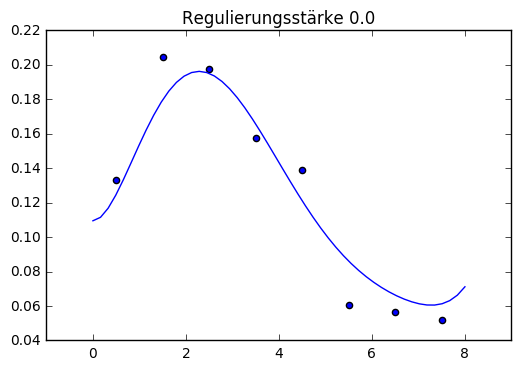

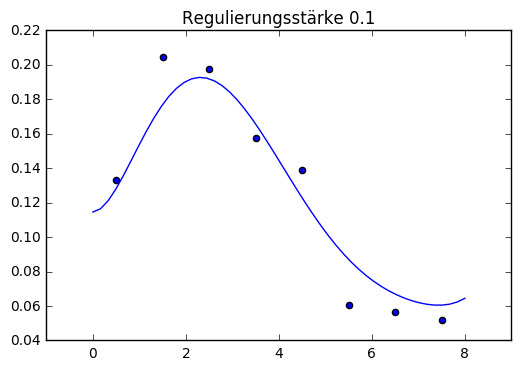

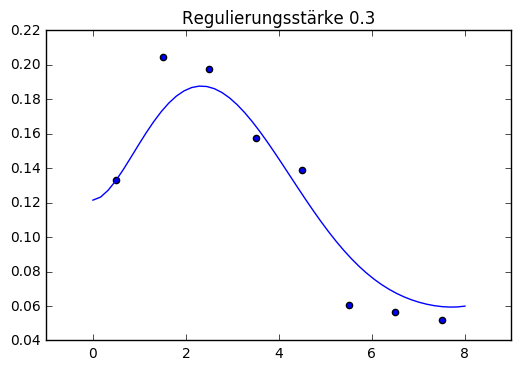

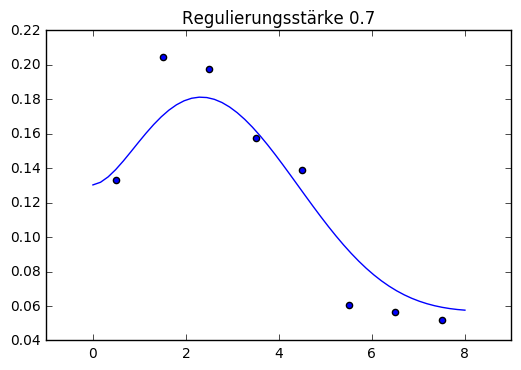

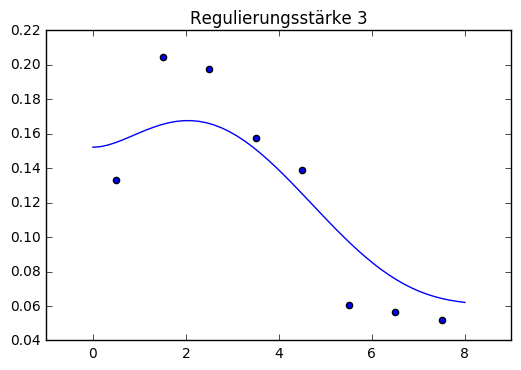

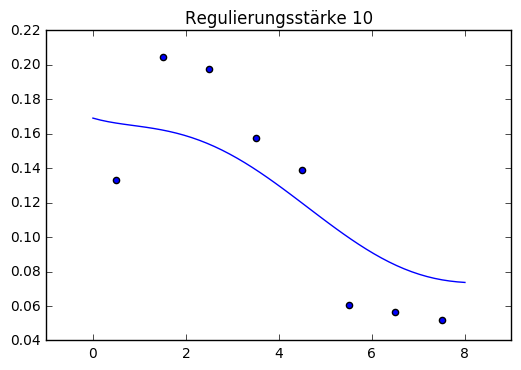

In [68]:
C = np.diagflat([1,1,1,1,1,1,1],-1) + np.diagflat([1,1,1,1,1,1,1],1) -np.diagflat([1,2,2,2,2,2,2,1])
CStern = np.delete(C, 0,0)
lam = [0.0,0.1,0.3,0.7,3,10]
for lam in lam:
    a = np.array(np.linalg.inv(AT*A+lam*np.transpose(CStern*A)*(CStern*A))*AT*y)
    f = np.poly1d(a.squeeze())
    plt.title('Regulierungsstärke %s' % lam)
    plt.plot(x,f(x))
    plt.scatter(aufgA[columns[0]],aufgA[columns[1]])
    plt.savefig('Regulierungsstärke%s.pdf' % lam)
    plt.show()

Funktion           6             5           4           3           2
3.63e-05 x - 0.0009856 x + 0.01019 x - 0.04737 x + 0.08237 x + 0.0001169 x + 0.1094


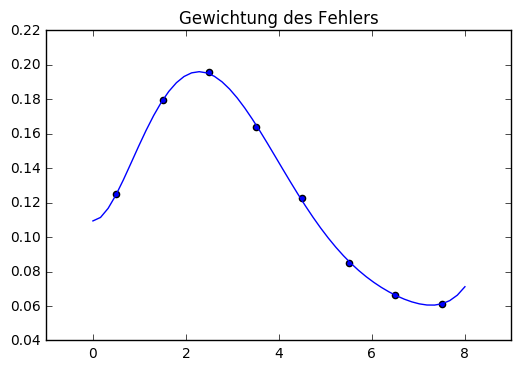

[[ 0.1248654   0.17935974  0.1960418   0.16400678  0.12276698  0.08509822
   0.06666902  0.06119224]
 [ 0.02465196  0.02947442  0.03078075  0.03149908  0.02221018  0.01793797
   0.01286382  0.01018269]]


In [77]:
b = np.array([np.mean(aufgC[columnsC[1:]], axis=1), np.std(aufgC[columnsC[1:]], axis=1)])
A = np.matrix(designPoly(aufgC[columnsC[0]]))
AT = np.matrix(A.transpose())
y = np.transpose(np.matrix(b[0,:]))

gamma = np.diagflat(b[1,:])
a = np.array(np.linalg.inv(AT*A+np.transpose(gamma*A)*(gamma*A))*AT*y)
g = np.poly1d(a.squeeze())
print('Funktion', g)
plt.title('Gewichtung des Fehlers')
plt.plot(x,g(x))
plt.scatter(aufgC[columns[0]],b[0,:])
plt.savefig('gewichtung.pdf')
plt.show()
print(b)